In [97]:
import numpy as np 
import pandas as pd
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


## Step 1: Research Problem
1. (5 points): If you are not familiar with this kind of scenario, but you were hired for this job in the real world, you would need to learn about it. Find two resources on the internet that are reliable and of good research quality (no forums, blogs, videos, social media, etc...)

Resources: 
1. The Economic & Emotional Cost of Hospital Readmissions: Healthstream.
- Source: https://www.healthstream.com/resource/blog/the-economic-emotional-cost-of-hospital-readmissions 


2. Reducing hospital readmissions
- Source: https://www.ncbi.nlm.nih.gov/books/NBK606114/

Citations: 
- Dhaliwal, J. S. (2024, June 7). Reducing hospital readmissions. StatPearls [Internet]. https://www.ncbi.nlm.nih.gov/books/NBK606114/ 
- The Economic & Emotional Cost of Hospital Readmissions: Healthstream. Default. (2021, April 1). https://www.healthstream.com/resource/blog/the-economic-emotional-cost-of-hospital-readmissions 

## Step 2: Download the dataset
2. (5 points): Download this dataset and assess it using ISLP 3.3 and 3.4 (like how you did for homework 3).

### Dataset Overview

In [98]:
hospital_df = pd.read_csv('hospital.csv')
hospital_df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023


In [99]:
hospital_df.shape

(18510, 12)

In [100]:
hospital_df.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [101]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               18510 non-null  object 
 1   Facility ID                 18510 non-null  int64  
 2   State                       18510 non-null  object 
 3   Measure Name                18510 non-null  object 
 4   Number of Discharges        8340 non-null   float64
 5   Footnote                    6583 non-null   float64
 6   Excess Readmission Ratio    11927 non-null  float64
 7   Predicted Readmission Rate  11927 non-null  float64
 8   Expected Readmission Rate   11927 non-null  float64
 9   Number of Readmissions      11927 non-null  object 
 10  Start Date                  18510 non-null  object 
 11  End Date                    18510 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [102]:
hospital_df.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,18510.000000,8340.000000,6583.000000,11927.000000,11927.000000,11927.000000
mean,261770.055105,279.269904,3.187756,1.001719,14.995386,14.961234
std,164647.739172,266.018069,2.089167,0.080547,5.017854,4.871997
min,10001.000000,0.000000,1.000000,0.477900,1.674200,2.892100
25%,110073.000000,115.000000,1.000000,0.956550,12.533000,12.612800
50%,250048.000000,197.000000,5.000000,0.998200,16.060200,16.146000
75%,390133.000000,354.000000,5.000000,1.043000,18.609000,18.667350
max,670327.000000,4501.000000,7.000000,1.643000,27.809500,25.394200


### Dataset Preprocessing

In [103]:
hospital_df.isna()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,False,False,False,False,True,False,True,True,True,True,False,False
18506,False,False,False,False,True,False,True,True,True,True,False,False
18507,False,False,False,False,True,False,True,True,True,True,False,False
18508,False,False,False,False,True,False,True,True,True,True,False,False


In [104]:
hospital_df.isna().sum()

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges          10170
Footnote                      11927
Excess Readmission Ratio       6583
Predicted Readmission Rate     6583
Expected Readmission Rate      6583
Number of Readmissions         6583
Start Date                        0
End Date                          0
dtype: int64

In [105]:
## I tried making a subset with droping only NA for footnotes but then it deleted the whole dataset so therefore I am removing the column since its justs about notes
hospital_df.drop(columns=['Footnote'], inplace=True)


In [106]:
hospital_df_clean = hospital_df.dropna(subset=[
    "Number of Discharges",
    "Excess Readmission Ratio",
    "Predicted Readmission Rate",
    "Expected Readmission Rate",
    "Number of Readmissions"
])

In [107]:
hospital_df_clean.shape

(8121, 11)

In [108]:
hospital_df_clean.isna().sum()

Facility Name                 0
Facility ID                   0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64

## Step 3: Describe Each Variable
3. (5 points): Describe each of the 12 variables in your own words, then mention the datatype of each.

**Facility Name:**
- The name of the hospital

**Facility ID:**
- The id of the hospital

**State:** 
- The state where the hospital is located

**Measure Name:** 
- The medical condition that is causing the readmission

**Number of Discharges:** 
- The total number of patients for that specific medical condition

**Footnote:** 
- Notes about the medical condition

**Excess Readmission Ratio:** 
- The rate comparing to expected readmission rate

**Predicted Readmission Rate:** 
- The predict percentage that patients will be readmitted

**Expected Readmission Rate:** 
- The expected percentage that patients will be readmitted

**Number of Readmissions:** 
- The actual number of readmitted patients

**Start Date:** 
- The start date of the data being collected

 **End Date:**
 - The end date of the data being collected                   

In [109]:
hospital_df.dtypes

## Drop Footnote but was a float64

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [110]:
hospital_df_clean = hospital_df_clean.copy()

hospital_df_clean["Number of Readmissions"] = pd.to_numeric(hospital_df_clean["Number of Readmissions"], errors="coerce")
hospital_df_clean["Start Date"] = pd.to_datetime(hospital_df_clean["Start Date"])
hospital_df_clean["End Date"] = pd.to_datetime(hospital_df_clean["End Date"])


In [111]:
hospital_df_clean.dtypes

Facility Name                         object
Facility ID                            int64
State                                 object
Measure Name                          object
Number of Discharges                 float64
Excess Readmission Ratio             float64
Predicted Readmission Rate           float64
Expected Readmission Rate            float64
Number of Readmissions                 int64
Start Date                    datetime64[ns]
End Date                      datetime64[ns]
dtype: object

## Step 4: Research Question
- (5 points): Form your research question that can be answered by this dataset.

In [112]:
hospital_df_clean.describe()

,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
count,8121.000000,8121.00000,8121.000000,8121.000000,8121.000000,8121.000000,8121,8121
mean,256179.848295,286.80101,1.009233,16.696794,16.549613,48.074868,2020-06-30 23:59:59.999999744,2023-06-30 00:00:00
min,10001.000000,25.00000,0.477900,1.674200,2.892100,11.000000,2020-07-01 00:00:00,2023-06-30 00:00:00
25%,110042.000000,120.00000,0.963500,14.701200,14.779000,19.000000,2020-07-01 00:00:00,2023-06-30 00:00:00
50%,250001.000000,203.00000,1.007200,17.258700,17.185500,31.000000,2020-07-01 00:00:00,2023-06-30 00:00:00
75%,390001.000000,361.00000,1.052700,19.324900,19.200500,59.000000,2020-07-01 00:00:00,2023-06-30 00:00:00
max,670260.000000,4501.00000,1.643000,27.809500,25.394200,877.000000,2020-07-01 00:00:00,2023-06-30 00:00:00
std,155404.795012,265.54472,0.078230,3.862805,3.656800,48.488707,NaN,NaN


In [113]:
hospital_df_clean["Measure Name"].unique()


array(['READM-30-AMI-HRRP', 'READM-30-CABG-HRRP', 'READM-30-HF-HRRP',
       'READM-30-PN-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HIP-KNEE-HRRP'],
      dtype=object)

In [114]:
hospital_df_clean["Measure Name"].nunique()


6

In [115]:
hospital_df_clean["Measure Name"].value_counts()


Measure Name
READM-30-HF-HRRP          2342
READM-30-PN-HRRP          2305
READM-30-COPD-HRRP        1550
READM-30-AMI-HRRP         1244
READM-30-CABG-HRRP         383
READM-30-HIP-KNEE-HRRP     297
Name: count, dtype: int64

*Data Dictionary:*
- READM-30-HF-HRRP: Heart Failure
- READM-30-PN-HRRP: Pneumonia
- READM-30-COPD-HRRP: Chronic Obstructive Pulmonary Disease
- READM-30-AMI-HRRP: Acute Myocardial Infarction
- READM-30-CABG-HRRP: Coronary Artery Bypass Graft
- READM-30-HIP-KNEE-HRRP: Total Hip/Knee Arthroplasty

### *Research Question*

What is the possibility based off the type of condition based on the predicted readmission rates and number of discharges?




## Step 5: Justifying to Board
- (5 points): Explain why your research question would be interesting to the board-- do not tailor your research question to me just because I'm your machine learning instructor. I'm interested in your model, but the board cares about money/patients

### Justification
- By anaylzing the predicted readmission rates based off the type of conditions, hospitals can cater to those patients, which could save money on excessive/unnessecary treatment, ensure being discharge instructions, and overall improving the patient care. This insight can provide the hospital new evidence to better use resource, potentially save money, and happier patients :). Happier Patients means less patients which means staff doesn't have to be burned out and meaning we are conserving resources. 

## Step 6: Logistic Regression (Multi) 
- (40 points): Choose any algorithm from chapter 5, 6, 7, or 8 to answer your research question. Explain your choice. For example, if you choose Lasso then be sure you apply lasso to your logistic or linear regression model. If you choose a decision tree, make sure your choice is informative for the board. Not too easy or insulting.

In [116]:
class MultinomialLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    # One hot encoding the measures
    def one_hot(self, y, num_classes): 
        return np.eye(num_classes)[y]

    def softmax(self, z):
        z -= np.max(z, axis=1, keepdims=True)
        exp_scores = np.exp(z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def cross_entropy(self, probs, Y):
        return -np.mean(np.sum(Y * np.log(probs + 1e-9), axis=1))

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.X_train = X
        num_samples, num_features = X.shape
        self.num_classes = len(np.unique(y))

        Y = self.one_hot(y, self.num_classes)

        #
        self.weights = np.random.randn(num_features, self.num_classes)

        for epoch in range(self.epochs):
            logits = X @ self.weights  # shape: (N, K)
            probs = self.softmax(logits)  # shape: (N, K)
            loss = self.cross_entropy(probs, Y)

            grad = X.T @ (probs - Y) / num_samples
            self.weights -= self.lr * grad

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        logits = X @ self.weights
        return self.softmax(logits)

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)


In [117]:
# One hot coding the Measure Names over the Predicted Rate & Number of Discharges
X = hospital_df_clean[["Predicted Readmission Rate", "Number of Discharges"]].values
y_raw = hospital_df_clean["Measure Name"].astype("category")
y = y_raw.cat.codes.values 

model = MultinomialLogisticRegression(lr=0.01, epochs=1000)
model.fit(X, y)

preds = model.predict(X)

accuracy = np.mean(preds == y)
print("Accuracy:", accuracy)


Epoch 0, Loss: 16.7656
Epoch 100, Loss: 14.7469
Epoch 200, Loss: 14.6457
Epoch 300, Loss: 14.7842
Epoch 400, Loss: 14.0457
Epoch 500, Loss: 14.2396
Epoch 600, Loss: 18.2560
Epoch 700, Loss: 17.4226
Epoch 800, Loss: 14.1859
Epoch 900, Loss: 16.1111
Accuracy: 0.23543898534663218


In [118]:
print("Number of classes:", len(np.unique(y)))


Number of classes: 6


Having 6 classes the expected randomness is 1/6 which is 16.67% so having the accuracy as double of 35.1% is great

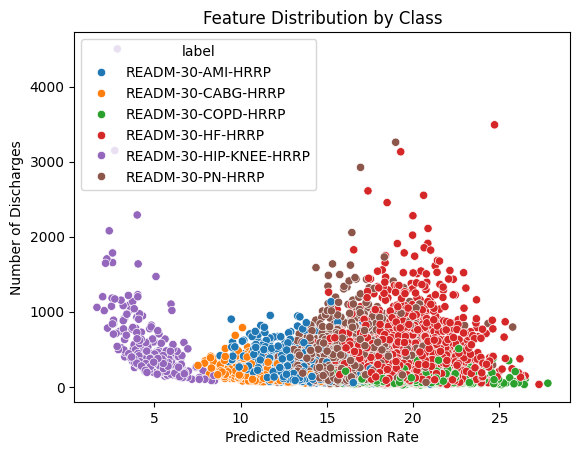

In [119]:
df_plot = hospital_df_clean.copy()
df_plot["label"] = y_raw

sns.scatterplot(data=df_plot,
                x="Predicted Readmission Rate",
                y="Number of Discharges",
                hue="label",
                palette="tab10")
plt.title("Feature Distribution by Class")
plt.show()


Anyalsis: 
- Hip/Knee has low readmission rates (< 10%)
- Heart Failure has higher rates (17-25%)
- Pneumonia has around 10-25% of readmission but is more spread out 
- AMI and CABG is around 10-15%
- COPD is more distributed around 15-25%

Hip/Knee shows a high number of discharges with low readmisson so that means the hositipal are doing well. However Heart failure has many discharges and high readmission, which is not good. Research should go into heart failure.

## Step 7: Validating
- (15 points): You need to validate your algorithm! If you want to use a package for this, that is okay.

In [120]:

def k_fold_cross_validation(model_class, X, y, k=5, lr=0.001, epochs=2000):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []
    all_y_true = []
    all_y_pred = []

    for i in range(k):
        test_idx = indices[i * fold_size : (i + 1) * fold_size]
        train_idx = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        model = model_class(lr=lr, epochs=epochs)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"\nFold {i+1}, Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    average_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy over {k} folds: {average_accuracy:.4f}")

    print("\All Folds Classification Report:")
    print(classification_report(all_y_true, all_y_pred, zero_division=0))

    return average_accuracy


<>:42: SyntaxWarning: invalid escape sequence '\A'
<>:42: SyntaxWarning: invalid escape sequence '\A'
/var/folders/xk/1bp4zhps6czgttf1kbb3b86c0000gn/T/ipykernel_39791/2292660299.py:42: SyntaxWarning: invalid escape sequence '\A'
  print("\All Folds Classification Report:")


Epoch 0, Loss: 14.7729
Epoch 100, Loss: 16.2542
Epoch 200, Loss: 14.6712
Epoch 300, Loss: 14.8285
Epoch 400, Loss: 13.3615
Epoch 500, Loss: 16.2274
Epoch 600, Loss: 14.1841
Epoch 700, Loss: 14.0051
Epoch 800, Loss: 14.5455
Epoch 900, Loss: 17.5421

Fold 1, Accuracy: 0.2962
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.48      0.26       251
           1       0.00      0.00      0.00        83
           2       0.47      0.48      0.48       294
           3       0.00      0.00      0.00       477
           4       0.00      0.00      0.00        55
           5       0.34      0.47      0.39       464

    accuracy                           0.30      1624
   macro avg       0.16      0.24      0.19      1624
weighted avg       0.21      0.30      0.24      1624



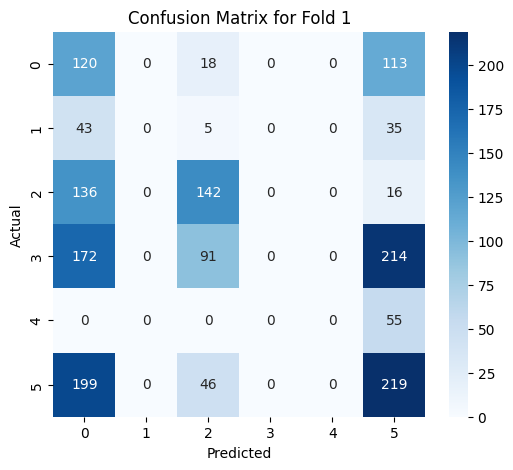

Epoch 0, Loss: 14.7618
Epoch 100, Loss: 14.8240
Epoch 200, Loss: 17.5128
Epoch 300, Loss: 12.9116
Epoch 400, Loss: 14.4364
Epoch 500, Loss: 13.4648
Epoch 600, Loss: 17.4298
Epoch 700, Loss: 12.8789
Epoch 800, Loss: 12.7828
Epoch 900, Loss: 16.6024

Fold 2, Accuracy: 0.2956
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.00      0.00      0.00        73
           2       0.45      0.18      0.25       313
           3       0.00      0.00      0.00       501
           4       0.00      0.00      0.00        62
           5       0.28      0.97      0.44       436

    accuracy                           0.30      1624
   macro avg       0.12      0.19      0.12      1624
weighted avg       0.16      0.30      0.17      1624



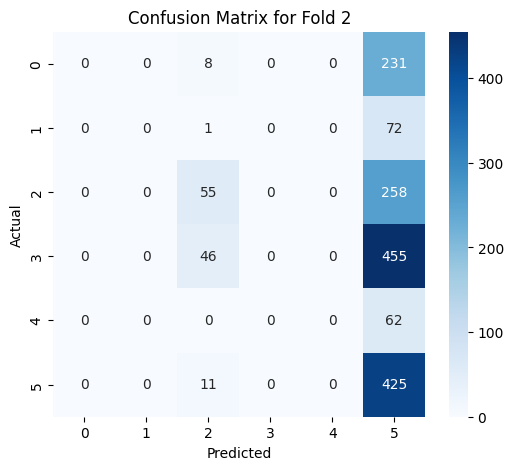

Epoch 0, Loss: 19.2859
Epoch 100, Loss: 14.6980
Epoch 200, Loss: 14.8575
Epoch 300, Loss: 12.3107
Epoch 400, Loss: 13.1131
Epoch 500, Loss: 15.4423
Epoch 600, Loss: 14.0757
Epoch 700, Loss: 13.6478
Epoch 800, Loss: 14.0581
Epoch 900, Loss: 14.3387

Fold 3, Accuracy: 0.2334
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.22      0.18       248
           1       0.00      0.00      0.00        70
           2       0.26      0.98      0.41       330
           3       0.00      0.00      0.00       453
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00       466

    accuracy                           0.23      1624
   macro avg       0.07      0.20      0.10      1624
weighted avg       0.08      0.23      0.11      1624



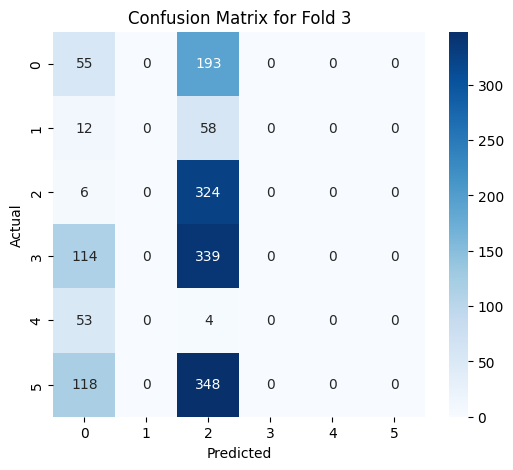

Epoch 0, Loss: 17.5704
Epoch 100, Loss: 13.7269
Epoch 200, Loss: 9.7286
Epoch 300, Loss: 17.5202
Epoch 400, Loss: 16.8880
Epoch 500, Loss: 13.7265
Epoch 600, Loss: 17.1113
Epoch 700, Loss: 13.6188
Epoch 800, Loss: 16.9565
Epoch 900, Loss: 14.7267

Fold 4, Accuracy: 0.2962
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       256
           1       0.00      0.00      0.00        77
           2       0.59      0.18      0.28       320
           3       0.28      0.94      0.43       447
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00       461

    accuracy                           0.30      1624
   macro avg       0.14      0.19      0.12      1624
weighted avg       0.19      0.30      0.17      1624



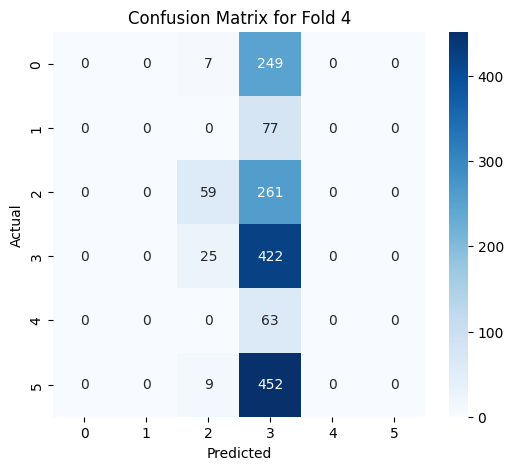

Epoch 0, Loss: 19.9673
Epoch 100, Loss: 14.7944
Epoch 200, Loss: 16.0153
Epoch 300, Loss: 13.3781
Epoch 400, Loss: 13.7810
Epoch 500, Loss: 14.0213
Epoch 600, Loss: 16.5100
Epoch 700, Loss: 14.1127
Epoch 800, Loss: 14.4339
Epoch 900, Loss: 14.1156

Fold 5, Accuracy: 0.3042
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.00      0.00      0.00        80
           2       0.43      0.06      0.11       293
           3       0.00      0.00      0.00       464
           4       0.00      0.00      0.00        60
           5       0.30      0.99      0.46       478

    accuracy                           0.30      1624
   macro avg       0.12      0.18      0.10      1624
weighted avg       0.17      0.30      0.16      1624



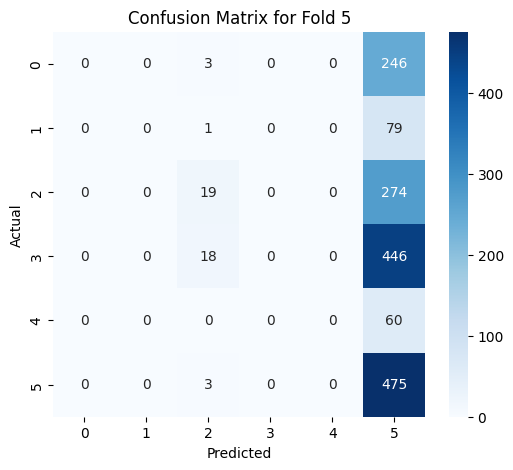


Average Accuracy over 5 folds: 0.2851
\All Folds Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.14      0.15      1243
           1       0.00      0.00      0.00       383
           2       0.33      0.39      0.35      1550
           3       0.28      0.18      0.22      2342
           4       0.00      0.00      0.00       297
           5       0.30      0.49      0.37      2305

    accuracy                           0.29      8120
   macro avg       0.18      0.20      0.18      8120
weighted avg       0.25      0.29      0.26      8120



In [121]:
average_acc = k_fold_cross_validation(MultinomialLogisticRegression, X, y, k=5, lr=0.01, epochs=1000)


Analysis: The average accuracy is quite low, which should be higher,but it is dealing with a small number of classes. There is a class inbalance having class 3 & 5 (Heart Failure/Pneumonia) have dominate the confusion matrix. The model barely predicts class 4 (Hip/Knee). This model is definetly underfiting which maybe more training data is needed.